Import Libraries and Prepare Dataset

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms



#to show data loading we write the word Step before it (They are 8 steps)
#Step 1: Prepare Pictures for the Computer(We're getting tools to help the computer understand and work with pictures.)


In [2]:
# We're getting pictures to use in our project from a special library called torchvision.
# If we don't already have these pictures in a folder we chose,
# the computer will download them from the official torchvision website for us.

# Normalize the pixel values of images.(The component in the script that deals with getting the data ready for training is divided everywhere. To be more precise, there are many phases in the training preparation. Meaning is not one block of code. It is scattered all over the bigger code)
transform = transforms.Compose([   #When we get pictures for the computer to learn from, we need to make them special so the computer can understand them. First, we change the pictures into numbers that the computer likes to work with. Then, we make sure the brightness and colors of the pictures are just right for the computer to learn easily. After that, we give these special pictures to the computer to learn from and tell it to remember them for when it needs to do its job.
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #Downloading and Transforming Data
])

#Step 2: Get Pictures for the Computer to Learn(Make the pictures ready for the computer and bring them to the computer to learn from.)

# We're collecting lots of pictures called CIFAR-10 for our computer to learn from.
# Some of these pictures will be used to teach the computer (training),
# and the rest will be used to check if the computer learned correctly (testing).
# We ask the computer to get these pictures for us so we can use them.

# Load CIFAR-10 dataset and define class names
train_data = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = CIFAR10(root='./data', train=False, download=True, transform=transform)

# These are the different types of things our computer will learn to recognize in the pictures.
# There are things like planes, cars, birds, cats, and more.(like the title for the column in databases )
# Data Exploration and Visualization(indicates the section where you'd typically perform data exploration and visualization. )
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#Data Eploration We meen:
## Getting and preparing images
# Downloading CIFAR-10 dataset and making pictures computer-friendly
# Checking example images
# Displaying sample images from the dataset
# Show one image from each class to understand them
# Dividing pictures for training and testing
# Splitting dataset into training and validation sets

100%|██████████| 170498071/170498071 [00:02<00:00, 77435041.74it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# Define the pre-trained ResNet-18 model and modify the output layer for CIFAR-10
pretrained_resnet = torchvision.models.resnet18(pretrained=True)
num_ftrs = pretrained_resnet.fc.in_features
pretrained_resnet.fc = nn.Linear(num_ftrs, 10)  # Change output size to match CIFAR-10 classes

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 80.7MB/s]


Imports for Regression

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Display Sample Images



In [5]:
import matplotlib.pyplot as plt
import numpy as np


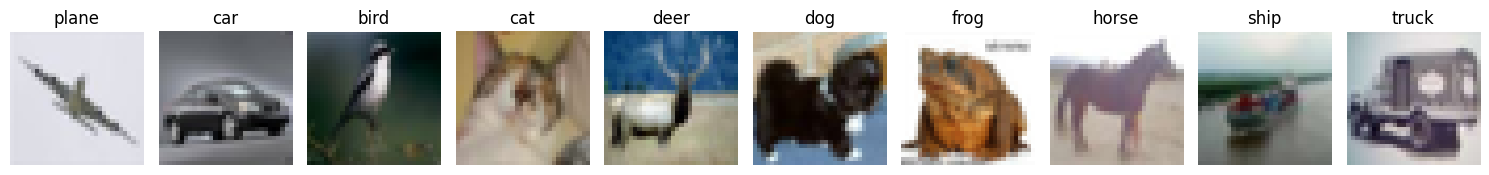

In [6]:
#This part of the computer code helps us look at pictures of different things, like cars, planes, animals, and more. It's like when you have a book with pictures of lots of different animals or toys.
#The computer picks one picture of each thing from its special collection and shows it to us. This way, we can see what each thing looks like in the computer's pictures.
#This helps the computer to learn and know what these things are when it looks at new pictures.

#Step 3: Explore the Pictures( Function to show sample pictures from different categories)

# Show a sample image from each class
def show_samples_from_each_class():
    # Create an empty list to store indices of each class
    class_indices = [[] for _ in range(len(class_names))]

    # Find the indices corresponding to each class
    for i in range(len(train_data)):
        _, label = train_data[i]
        class_indices[label].append(i)

    # Display one image from each class
    fig, axs = plt.subplots(1, len(class_names), figsize=(15, 3))

    for i, indices in enumerate(class_indices):
        random_index = np.random.choice(indices)
        image, _ = train_data[random_index]
        image = image / 2 + 0.5  # Unnormalize
        np_img = image.numpy()
        axs[i].imshow(np.transpose(np_img, (1, 2, 0)))
        axs[i].set_title(class_names[i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

show_samples_from_each_class()

Displays sample images from classes using Function with dataset argument

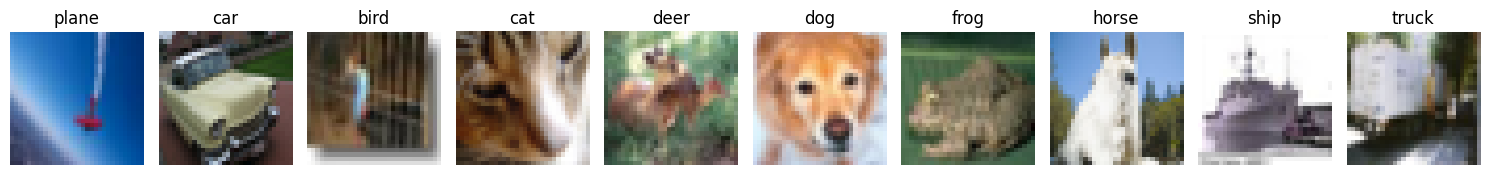

In [7]:
def show_samples_from_each_class(dataset):
    class_indices = [[] for _ in range(len(class_names))]

    for i in range(len(dataset)):
        _, label = dataset[i]
        class_indices[label].append(i)

    fig, axs = plt.subplots(1, len(class_names), figsize=(15, 3))

    for i, indices in enumerate(class_indices):
        random_index = np.random.choice(indices)
        image, _ = dataset[random_index]
        image = image / 2 + 0.5  # Unnormalize
        np_img = image.numpy()
        axs[i].imshow(np.transpose(np_img, (1, 2, 0)))
        axs[i].set_title(class_names[i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

show_samples_from_each_class(train_data)

 Define a Randomly Initialized CNN

In [8]:
!pip install pytorch-lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 13.4 MB/s eta 0:00:00


In [9]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

In [10]:
'''class CustomNet(pl.LightningModule):
    def __init__(self):
        super(CustomNet, self).__init__()
        # Define layers for the neural network
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

        # Store class names for visualization
        self.class_names = class_names'''  #something went wrong with this code, I restarted the computer and did troubleshoot. But still error. I kept it just in case

'class CustomNet(pl.LightningModule):\n    def __init__(self):\n        super(CustomNet, self).__init__()\n        # Define layers for the neural network\n        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)\n        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)\n        self.fc1 = nn.Linear(64 * 8 * 8, 128)\n        self.fc2 = nn.Linear(128, 10)\n\n        # Store class names for visualization\n        self.class_names = class_names'

In [11]:
'''class CustomNet(pl.LightningModule):
    def __init__(self):
        super(CustomNet, self).__init__()
        # Define layers for the neural network
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

        # Store class names for visualization
        self.class_names = class_names

    def forward(self, x):
        # Forward pass
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)'''  #something went wrong with this code, I restarted the computer and did troubleshoot. But still error. I kept it just in case

"class CustomNet(pl.LightningModule):\n    def __init__(self):\n        super(CustomNet, self).__init__()\n        # Define layers for the neural network\n        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)\n        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)\n        self.fc1 = nn.Linear(64 * 8 * 8, 128)\n        self.fc2 = nn.Linear(128, 10)\n\n        # Store class names for visualization\n        self.class_names = class_names\n\n    def forward(self, x):\n        # Forward pass\n        x = F.relu(self.conv1(x))\n        x = F.max_pool2d(x, 2)\n        x = F.relu(self.conv2(x))\n        x = F.max_pool2d(x, 2)\n        x = x.view(x.size(0), -1)\n        x = F.relu(self.fc1(x))\n        x = self.fc2(x)\n        return x\n\n    def training_step(self, batch, batch_idx):\n        x, y = batch\n        logits = self(x)\n        loss = F.cross_entropy(logits, y)\n        self.log('train_loss', loss)\n        return loss\n\n    def configure_optimizers(self):\n  

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl


In [13]:
class CustomNet(pl.LightningModule): #Step 4: Define a custom neural network
    def __init__(self):
        super(CustomNet, self).__init__()
        # Define layers for the neural network
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted input size to match the previous layer's output
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

        # Store class names for visualization
        self.class_names = class_names

    def forward(self, x):
        # Forward pass
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor before the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.cross_entropy(logits, y)
        self.log('train_loss', loss)
        return loss

    def train_dataloader(self):
        return DataLoader(train_data, batch_size=64, shuffle=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)



Train the Randomly Initialized CNN

In [14]:
random_model = CustomNet()   #Step 6: Train a randomly initialized model
random_trainer = pl.Trainer(max_epochs=10)
random_trainer.fit(random_model)
random_model.eval()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | conv1 | Conv2d    | 896   
1 | conv2 | Conv2d    | 18.5 K
2 | pool  | MaxPool2d | 0     
3 | fc1   | Linear    | 524 K 
4 | fc2   | Linear    | 1.3 K 
------------------------------------
545 K     Trainable params
0         Non-trainable params
545 K     Total params
2.180     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `n

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


CustomNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Prepare data for logistic regression

In [15]:
scaler = StandardScaler()
train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)
test_loader = DataLoader(test_data, batch_size=len(test_data))

for images, labels in train_loader:
    X_train = images.view(images.size(0), -1).numpy()
    y_train = labels.numpy()

for images, labels in test_loader:
    X_test = images.view(images.size(0), -1).numpy()
    y_test = labels.numpy()

Train logistic regression

In [16]:
log_reg_model = make_pipeline(scaler, LogisticRegression(max_iter=1000))
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Evaluate logistic regression

In [17]:
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression on test images: {accuracy * 100:.2f}%')

Accuracy of logistic regression on test images: 36.68%


Evaluate the Randomly Initialized CNN

In [18]:
random_model.eval()
correct = 0
total = 0

random_model.eval()
correct = 0
total = 0
test_loader = DataLoader(test_data, batch_size=64)

with torch.no_grad():
    for images, labels in test_loader:
        outputs = random_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the randomly initialized CNN on the test images: {accuracy:.2f}%')

Accuracy of the randomly initialized CNN on the test images: 71.38%


evaluation using scikit-learn's metrics.

In [28]:
y_pred = predicted  # Use predicted values from your code
y_test = np.array([labels]) if not isinstance(labels, np.ndarray) else labels  # Convert labels to a NumPy array if needed

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[1]]


Load and Train a Pre-trained ResNet

In [19]:
from torch.utils.data import random_split

In [20]:
pretrained_resnet = torchvision.models.resnet18(pretrained=True) #Step 7: Define and prepare a pre-trained ResNet model

num_ftrs = pretrained_resnet.fc.in_features
pretrained_resnet.fc = nn.Linear(num_ftrs, 10)  # Change output size to match CIFAR-10 classes

'''pretrained_trainer = pl.Trainer(max_epochs=10)
pretrained_trainer.fit(pretrained_resnet, train_data)'''#deleting the part where the computer learns on its own without using PyTorch Lightning, Now the computer should learn using the PyTorch Lightning training setup.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'pretrained_trainer = pl.Trainer(max_epochs=10)\npretrained_trainer.fit(pretrained_resnet, train_data)'

In [21]:
class PretrainedModel(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

#We take a big group of pictures and split it into two parts.
#Most of the pictures are used for teaching the computer (training).
#We keep a smaller part separate to test how well the computer learned (validation).
#This helps the computer to learn accurately without seeing all the pictures at once.

# Splitting data for train and validation
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)   #Step 5: Prepare data loaders for training
val_loader = DataLoader(val_dataset, batch_size=64)

# Define PyTorch Lightning trainer and train the model
pretrained_model = PretrainedModel(pretrained_resnet) #Step 8: Train the pre-trained ResNet model
pretrained_trainer = pl.Trainer(max_epochs=10)
pretrained_trainer.fit(pretrained_model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 11.2 M
---------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing th

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Evaluate the Pre-trained ResNet

In [22]:
# Evaluate the pre-trained ResNet model on the test data
pretrained_resnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_data:
        images, labels = data
        outputs = pretrained_resnet(images.unsqueeze(0))
        _, predicted = torch.max(outputs.data, 1)
        total += 1
        correct += (predicted == labels).sum().item()

print('Accuracy of the pre-trained ResNet on the test images: %d %%' % (100 * correct / total))

Accuracy of the pre-trained ResNet on the test images: 78 %


In [33]:
'''This code checks how well a clever system looks at pictures.
It sees how often the system is correct and also figures out more details about its accuracy using some smart math.
 It looks at how many things the computer got right out of all the pictures it saw.
Also It checks how accurate the computer is using some math, which helps us understand if it makes mistakes often and in what way.
'''
from sklearn.metrics import precision_score, recall_score, confusion_matrix

correct = 0
total = 0
y_pred = []
y_test = []

with torch.no_grad():
    for images, labels in test_data:
        outputs = pretrained_resnet(images.unsqueeze(0))
        _, predicted = torch.max(outputs.data, 1)
        total += 1
        correct += (predicted == labels).sum().item()
        y_pred.append(predicted.item())  # Append the predicted value
        y_test.append(labels)  # Append the label value itself, not its item

print('Accuracy of the pre-trained ResNet on the test images: %d %%' % (100 * correct / total))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy of the pre-trained ResNet on the test images: 78 %
Precision: 0.7909
Recall: 0.7839
Confusion Matrix:
[[865  10  25  22   4   3  14   8  36  13]
 [ 24 902   2  14   1   3   9   1  16  28]
 [ 49   6 723  65  38  28  55  23  13   0]
 [ 22   3  63 685  25 114  50  24  10   4]
 [ 25   4  53  88 700  44  44  34   5   3]
 [ 13   9  52 191  20 657  29  22   1   6]
 [ 12   5  24  63  12  12 862   6   3   1]
 [ 18   2  20  48  31  43   3 828   3   4]
 [ 61  14   7  17   6   8   5   2 854  26]
 [ 46 119   7  17   2   8   7   7  24 763]]


In [25]:
import pytorch_lightning as pl

print(pl.__version__)#we use this to know the version of pytorch_lightning for reqruirment.txt

2.1.2


This structure outlines the steps from data loading, model definition using PyTorch Lightning, training, and evaluation of the pre-trained ResNet model on the CIFAR-10 dataset.(Deep learning model, that can be trained)